<a href="https://colab.research.google.com/github/jergen98/Assignment6/blob/main/Copy_of_dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradio Pets

In [3]:
!pip install -Uqq fastai

In [4]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

In [5]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

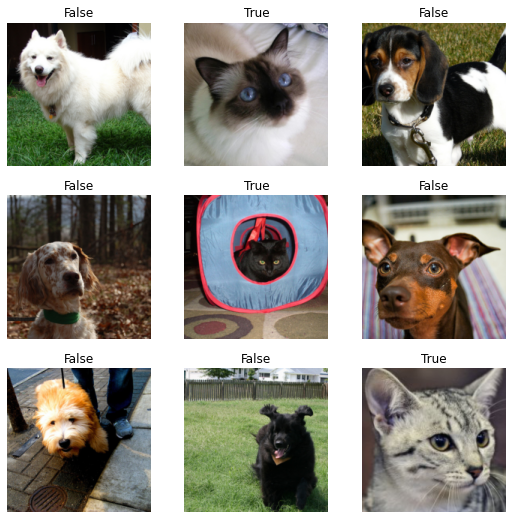

In [6]:
dls.show_batch()

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.192976,0.036741,0.013532,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.079719,0.040118,0.011502,00:47
1,0.038479,0.019735,0.006089,00:47
2,0.018775,0.018440,0.006766,00:47


In [8]:
learn.export('model.pkl')

# Test Gradio Cat

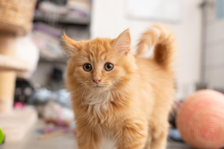

In [9]:
im = PILImage.create("cat.jpg")
im.thumbnail((224,224))
im

In [10]:
learn = load_learner("model.pkl")

In [11]:
learn.predict(im)

('True', TensorBase(1), TensorBase([2.1278e-04, 9.9979e-01]))